In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import shap
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics 

In [31]:
org_data = pd.read_csv('Data.csv')
org_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41666 entries, 0 to 41665
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   time                               41664 non-null  object 
 1   Comms and Services                 40812 non-null  float64
 2   Car Chargers                       40812 non-null  float64
 3   Space Heating                      40812 non-null  float64
 4   Hot Water                          40812 non-null  float64
 5   Sockets                            40812 non-null  float64
 6   Lighting                           40812 non-null  float64
 7   total_energy                       41664 non-null  object 
 8   datepart                           41664 non-null  float64
 9   weekend                            41664 non-null  object 
 10  bank holiday                       41664 non-null  object 
 11  hour                               41664 non-null  flo

C:\Users\mscVRstudent22\AppData\Local\Temp\ipykernel_31080\875856796.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  org_data = pd.read_csv('Data.csv')


In [32]:
# Generate a list of columns to drop
columns_to_drop = [col for col in org_data.columns if col.startswith('observation')]

# Drop these columns from the DataFrame
org_data = org_data.drop(columns=columns_to_drop)
org_data = org_data.dropna()
org_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40131 entries, 112 to 41663
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   time                               40131 non-null  object 
 1   Comms and Services                 40131 non-null  float64
 2   Car Chargers                       40131 non-null  float64
 3   Space Heating                      40131 non-null  float64
 4   Hot Water                          40131 non-null  float64
 5   Sockets                            40131 non-null  float64
 6   Lighting                           40131 non-null  float64
 7   total_energy                       40131 non-null  object 
 8   datepart                           40131 non-null  float64
 9   weekend                            40131 non-null  object 
 10  bank holiday                       40131 non-null  object 
 11  hour                               40131 non-null  float6

In [33]:
df = org_data

In [34]:
df['time'] = pd.to_datetime(df['time'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40131 entries, 112 to 41663
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   time                               40131 non-null  datetime64[ns, UTC]
 1   Comms and Services                 40131 non-null  float64            
 2   Car Chargers                       40131 non-null  float64            
 3   Space Heating                      40131 non-null  float64            
 4   Hot Water                          40131 non-null  float64            
 5   Sockets                            40131 non-null  float64            
 6   Lighting                           40131 non-null  float64            
 7   total_energy                       40131 non-null  object             
 8   datepart                           40131 non-null  float64            
 9   weekend                            40131 non-null  ob

In [36]:
df.set_index('time', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40131 entries, 2019-04-05 16:00:00+00:00 to 2023-12-31 23:00:00+00:00
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Comms and Services                 40131 non-null  float64
 1   Car Chargers                       40131 non-null  float64
 2   Space Heating                      40131 non-null  float64
 3   Hot Water                          40131 non-null  float64
 4   Sockets                            40131 non-null  float64
 5   Lighting                           40131 non-null  float64
 6   total_energy                       40131 non-null  object 
 7   datepart                           40131 non-null  float64
 8   weekend                            40131 non-null  object 
 9   bank holiday                       40131 non-null  object 
 10  hour                               40131 non-null  float64
 11  day of 

In [37]:
def get_season(month):
    if month in [3.0, 4.0, 5.0]:
        return 'Spring'
    elif month in [6.0, 7.0, 8.0]:
        return 'Summer'
    elif month in [9.0, 10.0, 11.0]:
        return 'Fall'
    else:
        return 'Winter'

# Apply the function directly on the 'month' column since it already contains the month as float
df['Season'] = df['month'].apply(get_season)

# Create separate DataFrames for each season
df_spring = df[df['Season'] == 'Spring']
df_summer = df[df['Season'] == 'Summer']
df_fall = df[df['Season'] == 'Fall']
df_winter = df[df['Season'] == 'Winter']

In [38]:
df_winter

,Comms and Services,Car Chargers,Space Heating,Hot Water,Sockets,Lighting,total_energy,datepart,weekend,bank holiday,...,forecast_temperature,forecast_feelslike,forecast_weathertype,forecast_windspeed,forecast_uvindex,forecast_precipitationprobability,forecast_winddirection,forecast_visibility,forecast_interval,Season
time,,,,,,,,,,,,,,,,,,,,,
2019-12-01 00:00:00+00:00,0.675019,0.0,0.197033,0.000000,0.089072,0.164750,1.125875001,43800.0,True,False,...,2.0,-1.0,0.0,9.0,0.0,2.0,NNW,MO,1 day,Winter
2019-12-01 01:00:00+00:00,0.674886,0.0,0.151378,0.000000,0.073492,0.149131,1.048886112,43800.0,True,False,...,2.0,-1.0,0.0,9.0,0.0,2.0,NNW,MO,23:00:00,Winter
2019-12-01 02:00:00+00:00,0.676042,0.0,0.149775,0.000000,0.073644,0.149217,1.048677778,43800.0,True,False,...,2.0,-1.0,0.0,9.0,0.0,1.0,NNW,MO,22:00:00,Winter
2019-12-01 03:00:00+00:00,0.676378,0.0,0.193631,0.000000,0.081700,0.149433,1.101141667,43800.0,True,False,...,2.0,-2.0,0.0,9.0,0.0,1.0,N,MO,1 day,Winter
2019-12-01 04:00:00+00:00,0.675572,0.0,0.175164,0.085864,0.083961,0.149456,1.170016667,43800.0,True,False,...,2.0,-2.0,0.0,9.0,0.0,0.0,N,MO,23:00:00,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00+00:00,0.431266,0.0,0.315221,0.000000,0.099255,0.233618,1.079359429,45291.0,True,False,...,10.0,6.0,15.0,22.0,0.0,96.0,SSE,MO,23:00:00,Winter
2023-12-31 20:00:00+00:00,0.431275,0.0,1.168081,0.429653,0.103842,0.232898,2.365749757,45291.0,True,False,...,10.0,6.0,15.0,22.0,0.0,97.0,SSE,MO,22:00:00,Winter
2023-12-31 21:00:00+00:00,0.432384,0.0,1.634023,0.000000,0.096170,0.213528,2.37610544,45291.0,True,False,...,11.0,7.0,15.0,34.0,0.0,96.0,SW,MO,1 day,Winter


In [39]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [40]:

def process_cyclic_feature(df):
    df =  encode(df, 'hour', 24)
    # df['day'] = df.datetime.dt.day
    # df = encode(df, 'day', 31)
    df = encode(df, 'day of week', 7)
    df = encode(df, 'day of month', 31)
    df['working_hours'] = df['hour'].apply(lambda x: 8 <= x <= 17)
    df['bank holiday'] = df['bank holiday'].astype(int)
    df['weekend'] = df['weekend'].astype(int)
    columns_to_convert = ['weekend','bank holiday']

    # Convert 0 and 1 to boolean values in specified columns
    df[columns_to_convert] = df[columns_to_convert].astype(bool)
    # Sum specified columns to create 'total_aob_energy'
    df['total_aob_energy'] = df[['Comms and Services', 'Space Heating', 'Hot Water', 'Sockets', 'Lighting']].sum(axis=1, skipna=True)

    # Drop the original columns except 'Car Chargers'
    df.drop(['Car Chargers','Comms and Services', 'Space Heating', 'Hot Water', 'Sockets', 'Lighting','datepart','day of week','day of month','hour','month','year'], axis=1, inplace=True)
    new_columns = []
    for col in df.columns:
        # Remove "Forecast_" if it exists and capitalize the first letter of the remaining string
        if col.startswith('forecast_'):
            new_name = col.replace('forecast_', '')  # Remove 'Forecast_'
            new_name = new_name.capitalize()  # Capitalize the first letter
        else:
            new_name = col  # Keep the original name if it doesn't start with 'Forecast_'
        new_columns.append(new_name)

    # Assign the modified column names back to the DataFrame
    df.columns = new_columns
    df.columns = [col.capitalize() for col in df.columns]
    df = df.select_dtypes(exclude=['object'])

    df.info()
    return df

In [41]:
df_spring = process_cyclic_feature(df_spring)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9753 entries, 2019-04-05 16:00:00+00:00 to 2023-05-31 23:00:00+00:00
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Weekend                   9753 non-null   bool   
 1   Bank holiday              9753 non-null   bool   
 2   Temperature               9753 non-null   float64
 3   Feelslike                 9753 non-null   float64
 4   Weathertype               9753 non-null   float64
 5   Windspeed                 9753 non-null   float64
 6   Uvindex                   9753 non-null   float64
 7   Precipitationprobability  9753 non-null   float64
 8   Hour_sin                  9753 non-null   float64
 9   Hour_cos                  9753 non-null   float64
 10  Day of week_sin           9753 non-null   float64
 11  Day of week_cos           9753 non-null   float64
 12  Day of month_sin          9753 non-null   float64
 13  Day of month_co

C:\Users\mscVRstudent22\AppData\Local\Temp\ipykernel_31080\2833083101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
C:\Users\mscVRstudent22\AppData\Local\Temp\ipykernel_31080\2833083101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
C:\Users\mscVRstudent22\AppData\Local\Temp\ipykernel_31080\2833083101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [46]:
X = df_spring.drop(['Total_aob_energy'], axis=1)  # Assuming 'energy_consumption' is the target variable
y = df_spring['Total_aob_energy']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# Model Training
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

#gradient-boosted regression model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

#Ridge Model 
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

#Lasso Model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

#Support Vector Regression 
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Model Evaluation
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gbr = gbr_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)

#https://stats.stackexchange.com/questions/255276/normalized-root-mean-square-error-nrmse-with-zero-mean-of-observed-value
# Calculate range of the target variable
y_range = np.max(y_test) - np.min(y_test)
# Calculate the mean of the target variable
y_mean = np.mean(y_test)
# Calculate RMSE for Linear Regression
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
# Calculate Normalised RMSE for Linear Regression
lr_nrmse = lr_rmse / y_range
# Calculate rRMSE (relative RMSE) for Linear Regression, normalized by the mean of y_test
lr_rrmse = lr_rmse / y_mean
# Calculate MAE
lr_mae = np.mean(np.abs(y_test - y_pred_lr))
print("Mean Absolute Error (MAE) for Linear Regression:", lr_mae)
# Calculate MAPE
# Note: We add a small number to the denominator to avoid division by zero in case y_test contains zeros.
lr_mape = np.mean(np.abs((y_test - y_pred_lr) / (y_test + 1e-10))) * 100
print("Mean Absolute Percentage Error (MAPE) for Linear Regression:", lr_mape, "%")

print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression NRMSE:", lr_nrmse)
print("Linear Regression rRMSE:", lr_rrmse)



# Calculate normalised RMSE for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
# Calculate Normalised RMSE for Random Forest
rf_nrmse = rf_rmse / y_range
# Calculate rRMSE (relative RMSE) for Random Forest, normalised by the mean of y_test
rf_rrmse = rf_rmse / y_mean
# Calculate MAE
rf_mae = np.mean(np.abs(y_test - y_pred_rf))
print("Mean Absolute Error (MAE) for Random Forest:", rf_mae)
# Calculate MAPE
# Note: We add a small number to the denominator to avoid division by zero in case y_test contains zeros.
rf_mape = np.mean(np.abs((y_test - y_pred_rf) / (y_test + 1e-10))) * 100
print("Mean Absolute Percentage Error (MAPE) for Random Forest:", rf_mape, "%")
print("Random Forest RMSE:", rf_rmse)
print("Random Forest NRMSE:", rf_nrmse)
print("Random Forest rRMSE:", rf_rrmse)



# Calculate nomrlaised RMSE for Gradient-boosted Regression
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
# Calculate Normalised RMSE for Gradient-boosted regression
gbr_nrmse = gbr_rmse / y_range
# Calculate rRMSE (relative RMSE) for Gradient boosting, normalised by the mean of y_test
gbr_rrmse = gbr_rmse / y_mean
# Calculate MAE
gbr_mae = np.mean(np.abs(y_test - y_pred_gbr))
print("Mean Absolute Error (MAE) for Gradient Boosting Regression:", gbr_mae)

# Calculate MAPE
# Note: We add a small number to the denominator to avoid division by zero in case y_test contains zeros.
gbr_mape = np.mean(np.abs((y_test - y_pred_gbr) / (y_test + 1e-10))) * 100
print("Mean Absolute Percentage Error (MAPE) for Gradient Boosting Regression:", gbr_mape, "%")
print("Gradient Boosting Regression RMSE:", gbr_rmse)
print("Gradient Boosting Regression NRMSE:", gbr_nrmse)
print("Gradient Boosting Regression rRMSE:", gbr_rrmse)

# Calculate nomrlaised RMSE for Ridge
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
# Calculate Normalised RMSE for Ridge regression
ridge_nrmse = ridge_rmse / y_range
# Calculate rRMSE (relative RMSE) for Ridge, normalised by the mean of y_test
ridge_rrmse = ridge_rmse / y_mean
# Calculate MAE
ridge_mae = np.mean(np.abs(y_test - y_pred_ridge))
print("Mean Absolute Error (MAE) for Ridge:", ridge_mae)

# Calculate MAPE
# Note: We add a small number to the denominator to avoid division by zero in case y_test contains zeros.
ridge_mape = np.mean(np.abs((y_test - y_pred_ridge) / (y_test + 1e-10))) * 100
print("Mean Absolute Percentage Error (MAPE) for Ridge:", ridge_mape, "%")
print("Ridge RMSE:", ridge_rmse)
print("Ridge NRMSE:", ridge_nrmse)
print("Ridge rRMSE:", ridge_rrmse)



# Calculate nomrlaised RMSE for Lasso
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
# Calculate Normalised RMSE for Lasso regression
lasso_nrmse = lasso_rmse / y_range
# Calculate rRMSE (relative RMSE) for Lasso, normalised by the mean of y_test
lasso_rrmse = lasso_rmse / y_mean
# Calculate MAE
lasso_mae = np.mean(np.abs(y_test - y_pred_lasso))
print("Mean Absolute Error (MAE) for Lasso:", lasso_mae)

# Calculate MAPE
# Note: We add a small number to the denominator to avoid division by zero in case y_test contains zeros.
lasso_mape = np.mean(np.abs((y_test - y_pred_lasso) / (y_test + 1e-10))) * 100
print("Mean Absolute Percentage Error (MAPE) for Lasso:", lasso_mape, "%")
print("Lasso RMSE:", lasso_rmse)
print("Lasso NRMSE:", lasso_nrmse)
print("Lasso rRMSE:", lasso_rrmse)

# Calculate nomrlaised RMSE for support vector regression
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
# Calculate Normalised RMSE for support vector regression regression
svr_nrmse = svr_rmse / y_range
# Calculate rRMSE (relative RMSE) for support vector regression, normalised by the mean of y_test
svr_rrmse = svr_rmse / y_mean
# Calculate MAE
svr_mae = np.mean(np.abs(y_test - y_pred_svr))
print("Mean Absolute Error (MAE) for SVR:", svr_mae)

# Calculate MAPE
# Note: We add a small number to the denominator to avoid division by zero in case y_test contains zeros.
svr_mape = np.mean(np.abs((y_test - y_pred_svr) / (y_test + 1e-10))) * 100
print("Mean Absolute Percentage Error (MAPE) for SVR:", svr_mape, "%")
print("SVR RMSE:", svr_rmse)
print("SVR NRMSE:", svr_nrmse)
print("SVR rRMSE:", svr_rrmse)

Mean Absolute Error (MAE) for Linear Regression: 0.7361347171049212
Mean Absolute Percentage Error (MAPE) for Linear Regression: 33.64320282039616 %
Linear Regression RMSE: 1.0075361847578064
Linear Regression NRMSE: 0.14720001720873777
Linear Regression rRMSE: 0.47573678769086564
Mean Absolute Error (MAE) for Random Forest: 0.7215042939650478
Mean Absolute Percentage Error (MAPE) for Random Forest: 31.407043442326987 %
Random Forest RMSE: 1.0328359971964505
Random Forest NRMSE: 0.1508962942086963
Random Forest rRMSE: 0.48768281174521283
Mean Absolute Error (MAE) for Gradient Boosting Regression: 0.6676087147333035
Mean Absolute Percentage Error (MAPE) for Gradient Boosting Regression: 27.987991848776637 %
Gradient Boosting Regression RMSE: 0.9660399042236563
Gradient Boosting Regression NRMSE: 0.14113745260695743
Gradient Boosting Regression rRMSE: 0.45614314182376353
Mean Absolute Error (MAE) for Ridge: 0.7361370299941751
Mean Absolute Percentage Error (MAPE) for Ridge: 33.6432939729

In [42]:
df_summer = process_cyclic_feature(df_summer)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10807 entries, 2019-06-01 00:00:00+00:00 to 2023-08-31 23:00:00+00:00
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Weekend                   10807 non-null  bool   
 1   Bank holiday              10807 non-null  bool   
 2   Temperature               10807 non-null  float64
 3   Feelslike                 10807 non-null  float64
 4   Weathertype               10807 non-null  float64
 5   Windspeed                 10807 non-null  float64
 6   Uvindex                   10807 non-null  float64
 7   Precipitationprobability  10807 non-null  float64
 8   Hour_sin                  10807 non-null  float64
 9   Hour_cos                  10807 non-null  float64
 10  Day of week_sin           10807 non-null  float64
 11  Day of week_cos           10807 non-null  float64
 12  Day of month_sin          10807 non-null  float64
 13  Day of month_c

C:\Users\mscVRstudent22\AppData\Local\Temp\ipykernel_31080\2833083101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
C:\Users\mscVRstudent22\AppData\Local\Temp\ipykernel_31080\2833083101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
C:\Users\mscVRstudent22\AppData\Local\Temp\ipykernel_31080\2833083101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [43]:
df_fall = process_cyclic_feature(df_fall)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10429 entries, 2019-09-01 00:00:00+00:00 to 2023-11-30 23:00:00+00:00
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Weekend                   10429 non-null  bool   
 1   Bank holiday              10429 non-null  bool   
 2   Temperature               10429 non-null  float64
 3   Feelslike                 10429 non-null  float64
 4   Weathertype               10429 non-null  float64
 5   Windspeed                 10429 non-null  float64
 6   Uvindex                   10429 non-null  float64
 7   Precipitationprobability  10429 non-null  float64
 8   Hour_sin                  10429 non-null  float64
 9   Hour_cos                  10429 non-null  float64
 10  Day of week_sin           10429 non-null  float64
 11  Day of week_cos           10429 non-null  float64
 12  Day of month_sin          10429 non-null  float64
 13  Day of month_c

C:\Users\mscVRstudent22\AppData\Local\Temp\ipykernel_31080\2833083101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
C:\Users\mscVRstudent22\AppData\Local\Temp\ipykernel_31080\2833083101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
C:\Users\mscVRstudent22\AppData\Local\Temp\ipykernel_31080\2833083101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [44]:
df_winter = process_cyclic_feature(df_winter)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9142 entries, 2019-12-01 00:00:00+00:00 to 2023-12-31 23:00:00+00:00
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Weekend                   9142 non-null   bool   
 1   Bank holiday              9142 non-null   bool   
 2   Temperature               9142 non-null   float64
 3   Feelslike                 9142 non-null   float64
 4   Weathertype               9142 non-null   float64
 5   Windspeed                 9142 non-null   float64
 6   Uvindex                   9142 non-null   float64
 7   Precipitationprobability  9142 non-null   float64
 8   Hour_sin                  9142 non-null   float64
 9   Hour_cos                  9142 non-null   float64
 10  Day of week_sin           9142 non-null   float64
 11  Day of week_cos           9142 non-null   float64
 12  Day of month_sin          9142 non-null   float64
 13  Day of month_co

C:\Users\mscVRstudent22\AppData\Local\Temp\ipykernel_31080\2833083101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
C:\Users\mscVRstudent22\AppData\Local\Temp\ipykernel_31080\2833083101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
C:\Users\mscVRstudent22\AppData\Local\Temp\ipykernel_31080\2833083101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

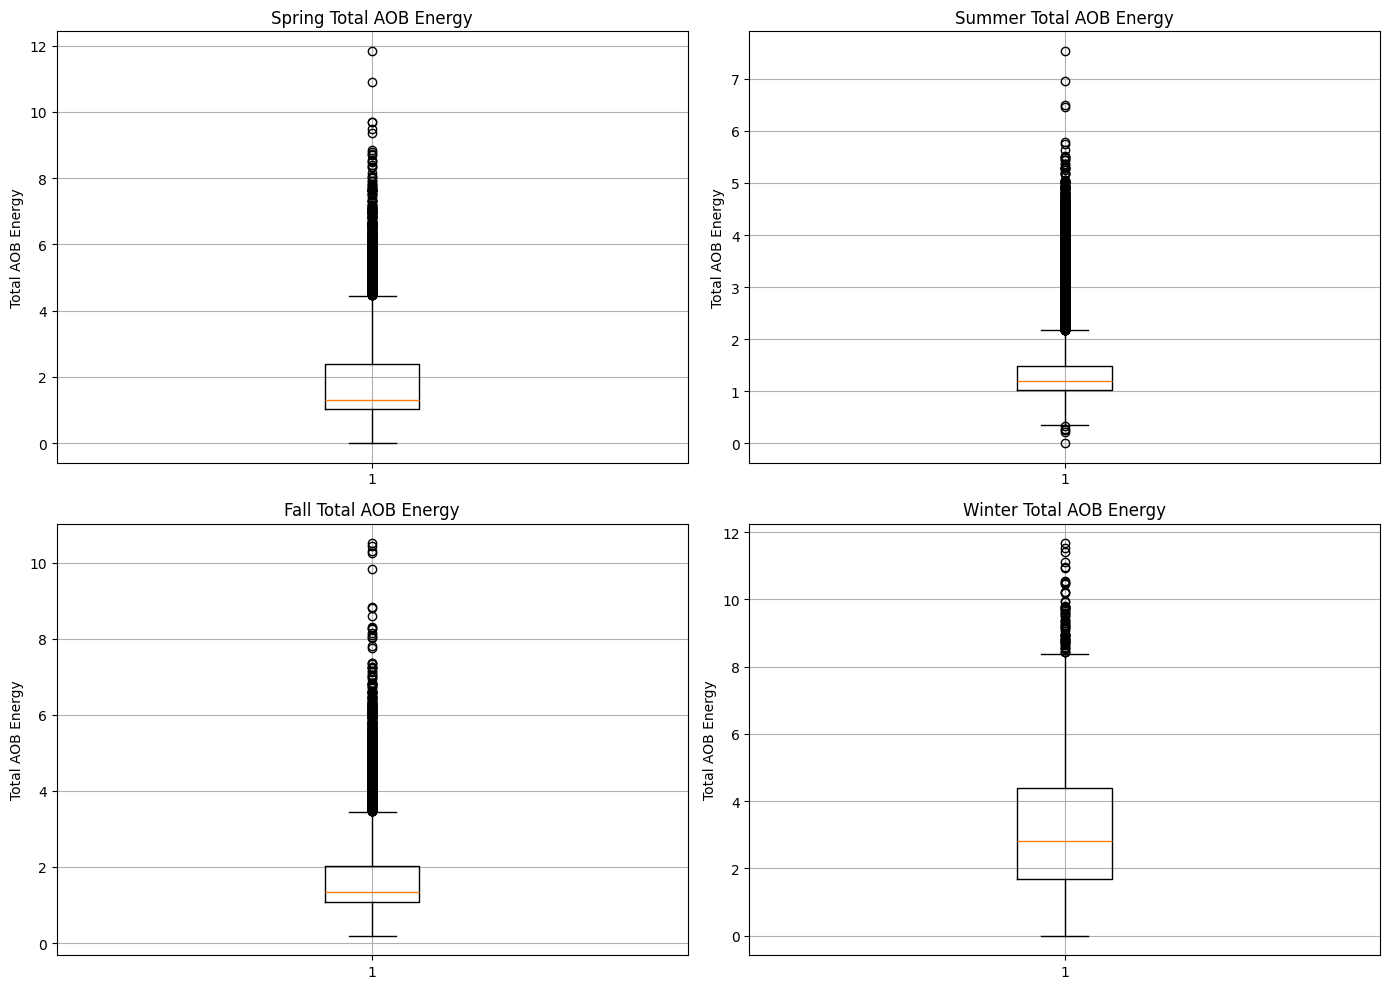

In [45]:

plt.figure(figsize=(14, 10))  # Set the figure size for better visibility

# Spring subplot
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
plt.boxplot(df_spring['Total_aob_energy'])
plt.title('Spring Total AOB Energy')
plt.ylabel('Total AOB Energy')
plt.grid(True)

# Summer subplot
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
plt.boxplot(df_summer['Total_aob_energy'])
plt.title('Summer Total AOB Energy')
plt.ylabel('Total AOB Energy')
plt.grid(True)

# Fall subplot
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
plt.boxplot(df_fall['Total_aob_energy'])
plt.title('Fall Total AOB Energy')
plt.ylabel('Total AOB Energy')
plt.grid(True)

# Winter subplot
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
plt.boxplot(df_winter['Total_aob_energy'])
plt.title('Winter Total AOB Energy')
plt.ylabel('Total AOB Energy')
plt.grid(True)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

In [48]:

def evaluate_models(df, season):
    X = df.drop(['Total_aob_energy'], axis=1)
    y = df['Total_aob_energy']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100),
        'Gradient Boosting': GradientBoostingRegressor(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'SVR': SVR()
    }
    
    print(f"\n{season} Season Evaluation:")
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        y_range = np.max(y_test) - np.min(y_test)
        y_mean = np.mean(y_test)
        nrmse = rmse / y_range
        rrmse = rmse / y_mean
        mae = np.mean(np.abs(y_test - y_pred))
        mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10))) * 100
        
        # Print results
        print(f"{name} -> RMSE: {rmse:.2f}, NRMSE: {nrmse:.2f}, rRMSE: {rrmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")



In [49]:
evaluate_models(df_spring, 'Spring')
evaluate_models(df_summer, 'Summer')
evaluate_models(df_fall, 'Fall')
evaluate_models(df_winter, 'Winter')



Spring Season Evaluation:
Linear Regression -> RMSE: 1.01, NRMSE: 0.15, rRMSE: 0.48, MAE: 0.74, MAPE: 33.64%
Random Forest -> RMSE: 1.02, NRMSE: 0.15, rRMSE: 0.48, MAE: 0.71, MAPE: 30.89%
Gradient Boosting -> RMSE: 0.97, NRMSE: 0.14, rRMSE: 0.46, MAE: 0.67, MAPE: 27.97%
Ridge -> RMSE: 1.01, NRMSE: 0.15, rRMSE: 0.48, MAE: 0.74, MAPE: 33.64%
Lasso -> RMSE: 1.11, NRMSE: 0.16, rRMSE: 0.53, MAE: 0.79, MAPE: 35.61%
SVR -> RMSE: 1.21, NRMSE: 0.18, rRMSE: 0.57, MAE: 0.82, MAPE: 31.35%

Summer Season Evaluation:
Linear Regression -> RMSE: 0.51, NRMSE: 0.12, rRMSE: 0.36, MAE: 0.37, MAPE: 26.01%
Random Forest -> RMSE: 0.54, NRMSE: 0.13, rRMSE: 0.38, MAE: 0.35, MAPE: 24.06%
Gradient Boosting -> RMSE: 0.47, NRMSE: 0.11, rRMSE: 0.33, MAE: 0.32, MAPE: 21.57%
Ridge -> RMSE: 0.51, NRMSE: 0.12, rRMSE: 0.36, MAE: 0.37, MAPE: 26.00%
Lasso -> RMSE: 0.53, NRMSE: 0.12, rRMSE: 0.38, MAE: 0.37, MAPE: 24.54%
SVR -> RMSE: 0.53, NRMSE: 0.12, rRMSE: 0.38, MAE: 0.31, MAPE: 17.75%

Fall Season Evaluation:
Linear Re